# Velocity Control in Python

In [54]:
import time
import numpy as np
import numpy as np
from scipy.integrate import solve_ivp

In [53]:
temp = np.array([])
temp = np.append(temp, 5)
np.linspace(0, increment, 2)

array([0.   , 0.001])

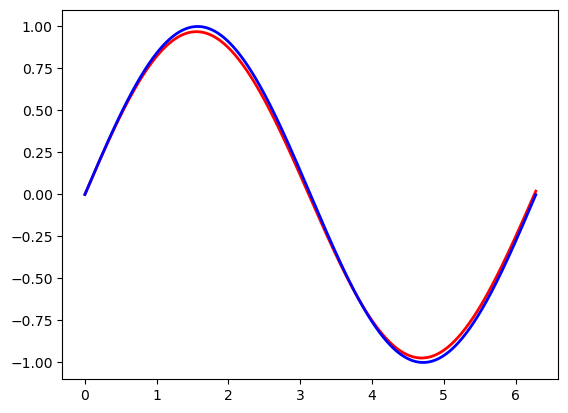

In [130]:
# Initialization
tstart = 0
tstop = 2*np.pi
increment = 0.001

# desired trajectory
t = np.arange(tstart, tstop, increment)
y_des = np.sin(t)
dy_des = np.gradient(y_des, increment)

# assign constants numerical values
k = 100
b = 10
m = 1

# initial conditions: position = 0, velocity = 0
x0 = np.array([y_des[0]])
x_dot0 = np.array([dy_des[0]])

# y[0] = x, y[1] = x_dot
def spring_mass_ODE(t, y):
    return (y[1],- k*y[0]/m - b*y[1]/m)

x = np.zeros(np.shape(y_des))
x_dot = np.zeros(np.shape(y_des))
t_sim = np.zeros(np.shape(y_des))


Kp = 1
for i, time in enumerate(t[1:]):
    # sol = solve_ivp(spring_mass_ODE, [0 , increment], (y_des[i]-x0[i], dy_des[i]-x_dot0[i]),
    sol = solve_ivp(spring_mass_ODE, [0 , increment], (x0[i], dy_des[i]+Kp*(y_des[i]-x0[i])),
    # sol = solve_ivp(spring_mass_ODE, [0 , increment], (x0[i], x_dot0[i]),
                    t_eval=np.linspace(0, increment, 2))
    x_at_t, x_dot_at_t = sol.y
    x0 = np.append(x0, x_at_t[1])
    x_dot0 = np.append(x_dot0, x_dot_at_t[1])

    

idx_s = 0
idx_e = -1
plt.plot(t[idx_s:idx_e], x0[idx_s:idx_e], 'r', lw=2, label=r'$x$')
plt.plot(t[idx_s:idx_e], y_des[idx_s:idx_e], 'b', lw=2, label=r'$\dot x$')


# # Controller Constants
# Kp = 1

# u = dy_des + Kp * (y_des - y)


In [22]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from sympy.physics.mechanics import *
init_vprinting()

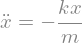

In [33]:
# define symbols
m, g, k, t, b = symbols('m g k t b')
x = dynamicsymbols('x')

# take derivatives
x_dot = diff(x, t)
x_ddot = diff(x_dot, t)

# Lagrangian
T = 1/2*m*x_dot**2
V = 1/2*k*x**2
L = T - V + b*x_dot

# solve Euler-Lagrange
eqn = diff( diff(L, x_dot), t) - diff(L,x)
sln = solve(eqn, x_ddot)[0]
Eq(x_ddot, sln)


In [26]:
import numpy as np
from scipy.integrate import solve_ivp

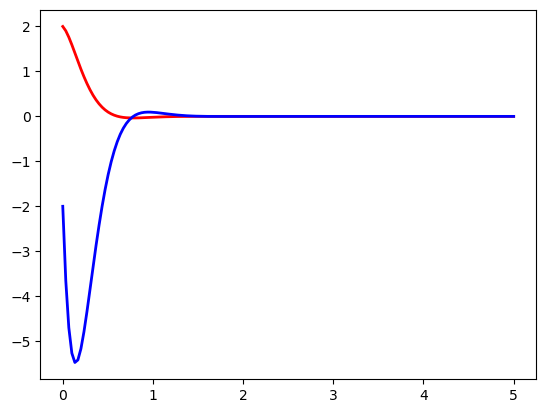

In [40]:
# assign constants numerical values
g = 9.81
k = 40
b = 10
m = 1

# initial conditions: position = 0, velocity = 0
x0 = 2
x_dot0 = -2

# y[0] = x, y[1] = x_dot
def spring_mass_ODE(t, y):
    return (y[1],- k*y[0]/m - b*y[1]/m)

sol = solve_ivp(spring_mass_ODE, [0 , 5], (x0, x_dot0),
                t_eval=np.linspace(0, 5, 5*30))


# output of the solver
x, x_dot = sol.y
t = sol.t

plt.plot(t, x, 'r', lw=2, label=r'$x$')
plt.plot(t, x_dot, 'b', lw=2, label=r'$\dot x$')